In [29]:
# prompt: how to connect my drive

from google.colab import drive
drive.mount('/drive')


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
!pip install scikit-learn

In [35]:
# prompt: add dataset from drive called test.cvs and train.cvs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Read the files from Google Drive
test_data = pd.read_csv('/drive/My Drive/test (2).csv')
train_data = pd.read_csv('/drive/My Drive/train (2).csv')
submission_data = pd.read_csv('/drive/My Drive/sample_submission.csv')




In [38]:
# Select specific columns
selected_columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'SalePrice']
train_data = train_data[selected_columns]


In [ ]:
# Add missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
train_data_imputed = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)

In [ ]:
# Visualize the correlation matrix for training data
correlation_matrix_train = train_data_imputed.corr()
sns.heatmap(correlation_matrix_train, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Training Data)")
plt.show()

In [ ]:
# Split the training data into features (X) and target variable (y)
X_train = train_data_imputed.drop('SalePrice', axis=1)
y_train = train_data_imputed['SalePrice']

In [ ]:
# Split the training data into training and testing sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Predictive Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_split, y_train_split)
linear_predictions = linear_model.predict(X_test_split)
linear_rmse = np.sqrt(mean_squared_error(y_test_split, linear_predictions))
print(f'Linear Regression RMSE: {linear_rmse}')

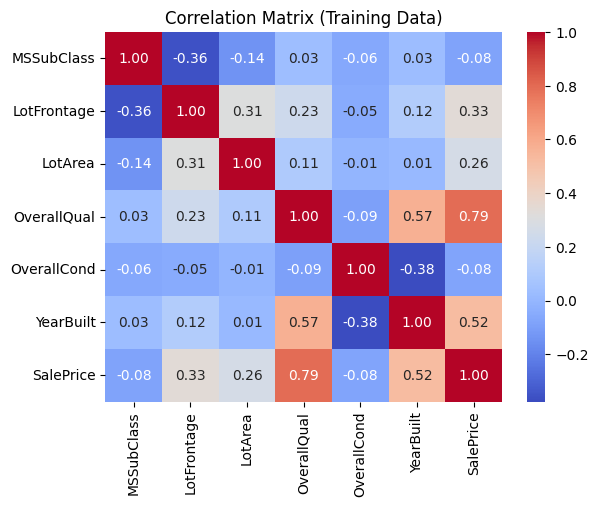

Linear Regression RMSE: 47854.018331774285
Random Forest Regression RMSE: 40365.97255359068


In [36]:
# Predictive Model 2: Random Forest Regression
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_split, y_train_split)
rf_predictions = random_forest_model.predict(X_test_split)
rf_rmse = np.sqrt(mean_squared_error(y_test_split, rf_predictions))
print(f'Random Forest Regression RMSE: {rf_rmse}')
